# Diagnóstico Inicial da Evasão - UFRB

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

def plot_percentage(df, x, y, xlabel):   
    counts = df.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()
    print(counts)
    g = sns.catplot(x=x, y='percent', hue=y, data=counts, kind='bar')
    
    g.set(xlabel = xlabel)
    
    new_title = 'Evasão'
    g._legend.set_title(new_title)
    # replace labels
    new_labels = ['Não', 'Sim']
    for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
    plt.show()

df = pd.read_csv('/home/ramon/extrator/survival/evasao.csv')

In [2]:
def permutation_test(events, obs_diff, n1):
    n = len(events)
    n2 = n-n1
    idxs = np.arange(0, n)



    values = []
    for i in range(10000):
        foo = np.full(n, False)
        idx_a = np.random.choice(idxs, n1, replace=False)
        foo[idx_a] = True

        diff = np.abs(events[foo].mean() - events[~foo].mean())
        values.append(diff)

    return (np.mean(np.array(values) > obs_diff))

def proportion_test(df, col_name):
    idx = df['time'] == df.groupby('matricula')['time'].transform('max')
    counts = df[idx].groupby(col_name)['event'].mean().values
    obs_diff = np.abs(counts[0] - counts[1])
    n1 = df[idx][col_name].value_counts().values[0]
    events = df.loc[idx, 'event'].values
    
    return (permutation_test(events, obs_diff, n1))

from statsmodels.stats.proportion import proportions_ztest

def proportion_test2(df, col_name):
    idx = df['time'] == df.groupby('matricula')['time'].transform('max')
    count = df[idx].groupby(col_name)['event'].sum().values
    nobs = df[idx].groupby(col_name)['event'].count().values

    stat, pval = proportions_ztest(count, nobs)
    return pval

In [3]:
idx = (df['time'] == df.groupby('matricula')['time'].transform('max'))


df.loc[idx, 'centro'].value_counts(normalize=True)*100

CCAAB     29.958810
CAHL      21.279805
CFP       18.506701
CETEC     17.352207
CCS        9.497012
CETENS     2.210361
CECULT     1.195104
Name: centro, dtype: float64

In [4]:
df.groupby('time')['event'].value_counts()

time  event
1     0        13597
      1         3640
2     0        12004
      1         1486
3     0        10901
      1         1097
4     0         9543
      1         1366
Name: event, dtype: int64

# Perfil dos Estudantes na Amostra

- 44% evadiram
- 81% possuem cidade de origem diferente da cidade do campus
- 55% são do sexo feminino
- Idade média dos estudantes é 24
- Há 17237 números de matrículas

In [5]:
idx = (df['time'] == df.groupby('matricula')['time'].transform('max'))

print(df[idx]['event'].value_counts(normalize=True))

print(df[idx]['is_outra_cidade'].value_counts(normalize=True))

print(df[idx]['sexo'].value_counts(normalize=True))

print(df[idx]['idade_ingresso'].mean())

print(df.matricula.nunique())

0    0.559726
1    0.440274
Name: event, dtype: float64
1    0.807217
0    0.192783
Name: is_outra_cidade, dtype: float64
0    0.546673
1    0.453327
Name: sexo, dtype: float64
23.549341532749317
17237


# Q1 Taxa de evasão é maior para estudantes cuja cidade de origem difere da cidade do campus?


- Sim. Taxa de evasão é maior para estudantes cuja cidade de origem difere daquela do campus (45% vs 42%)
- A diferença é estatisticamente significativa

1    0.807217
0    0.192783
Name: is_outra_cidade, dtype: float64
   is_outra_cidade  event    percent
0                0      0  58.170328
1                0      1  41.829672
2                1      0  55.447750
3                1      1  44.552250


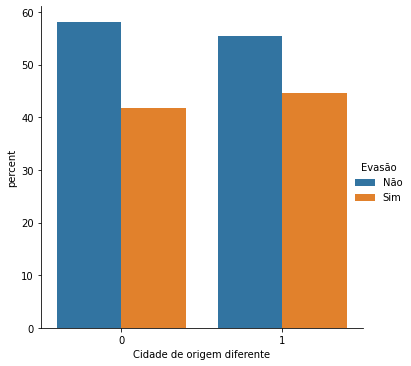

In [6]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['is_outra_cidade'].value_counts(normalize=True))

plot_percentage(df[idx], 'is_outra_cidade', 'event', 'Cidade de origem diferente')

In [7]:
#print('%.3f'%(proportion_test(df, 'is_outra_cidade')))
print(proportion_test2(df, 'is_outra_cidade'))

0.004504605731426043


# Q2 Taxa de evasão é maior para ingressantes no 1o semestre ou 2o semestre letivo? (Ex: taxa de evasão é maior para ingressantes em 2019.1 ou 2019.2?)

- Taxa de Evasão é maior entre ingressantes no 1o semestre (47% vs 40%)
- A diferença é estatisticamente significativa

1    0.637176
2    0.362824
Name: semestreIngresso, dtype: float64
   semestreIngresso  event    percent
0                 1      0  53.500865
1                 1      1  46.499135
2                 2      0  60.313399
3                 2      1  39.686601


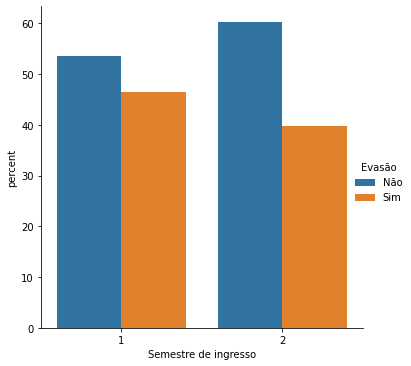

In [8]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['semestreIngresso'].value_counts(normalize=True))

plot_percentage(df[idx], 'semestreIngresso', 'event', 'Semestre de ingresso')

In [9]:
#print('%.3f'%(proportion_test(df, 'periodoingresso')))
print(proportion_test2(df, 'semestreIngresso'))

4.595289631697977e-18


# Q3 A taxa de evasão é maior no 1o ou 2o semestre do ano?

- Taxa de evasão é maior no 1o semestre do ano (46% vs 41%)
- A diferença é estatisticamente significativa

1    0.533387
2    0.466613
Name: semestreLetivo, dtype: float64
   semestreLetivo  event    percent
0               1      0  53.578421
1               1      1  46.421579
2               2      0  58.709437
3               2      1  41.290563


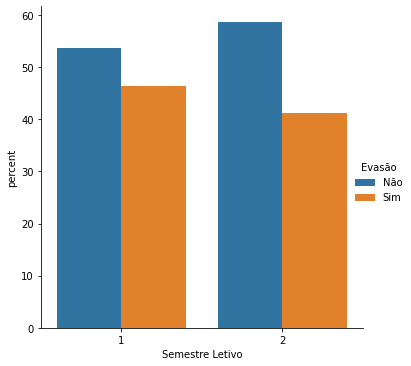

In [10]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['semestreLetivo'].value_counts(normalize=True))

plot_percentage(df[idx], 'semestreLetivo', 'event', 'Semestre Letivo')

In [11]:
print(proportion_test2(df, 'semestreLetivo'))

1.2883920037815867e-11


# Q4 Taxa taxa de evasão é maior para homens ou mulheres?

- A taxa de evasão é maior para homens (49% vs 40%).
- A diferença é estatisticamente significativa.
- Taxa de evasão apresenta crescimento do 3o para 4o período

0    0.546673
1    0.453327
Name: sexo, dtype: float64
   sexo  event    percent
0     0      0  59.874774
1     0      1  40.125226
2     1      0  51.266957
3     1      1  48.733043


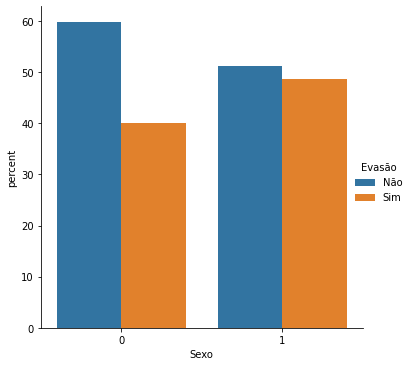

In [12]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['sexo'].value_counts(normalize=True))

plot_percentage(df[idx], 'sexo', 'event', 'Sexo')

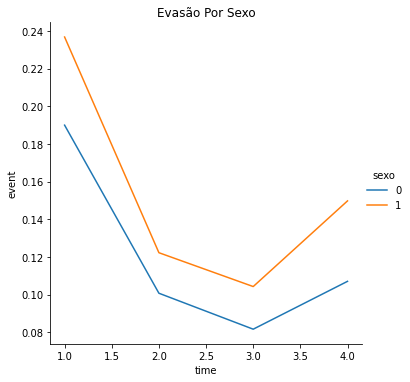

In [13]:
data = df.groupby(['time','sexo']).agg({'event':'mean'}).reset_index()
ax = sns.relplot(x='time', y='event', data=data, hue='sexo',  kind="line")    
ax.set(title='Evasão Por Sexo')    

In [14]:
#print('%.3f'%(proportion_test(df, 'sexo')))
print(proportion_test2(df, 'sexo'))

9.008242109919601e-30


# Q5 Taxa de evasão decresce com o tempo?

- A taxa de evasão tende a decrescer com o tempo

[Text(0.5, 1.0, 'Evasão Geral')]

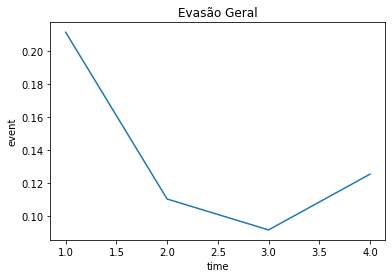

In [15]:
data = df.groupby('time').agg({'event':'mean'}).reset_index()

ax = sns.lineplot(x='time', y='event', data=data)    
ax.set(title='Evasão Geral')

# Q6 Taxa de evasão difere entre ingressantes por cota e ampla concorrência?

- A taxa de evasão é maior para Ampla Concorrência (45% vs 43%)
- A diferença observada não é estatisticamente significativa

0    0.508905
1    0.491095
Name: is_cotista, dtype: float64
   is_cotista  event    percent
0           0      0  55.437756
1           0      1  44.562244
2           1      0  56.526875
3           1      1  43.473125


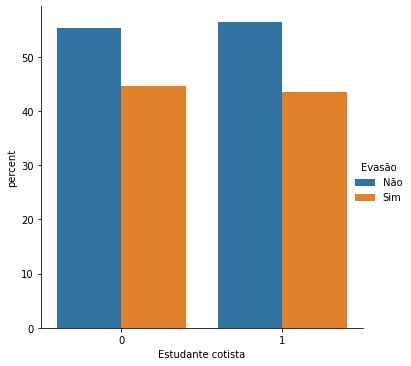

In [16]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['is_cotista'].value_counts(normalize=True))

plot_percentage(df[idx], 'is_cotista', 'event', 'Estudante cotista')

In [17]:
#print('%.3f'%(proportion_test(df, 'is_cotista')))
print(proportion_test2(df, 'is_cotista'))

0.1498716197356707


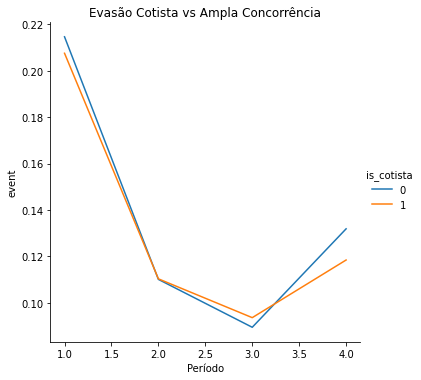

In [18]:
data = df.groupby(['time','is_cotista']).agg({'event':'mean'}).reset_index()
ax = sns.relplot(x='time', y='event', data=data, hue='is_cotista',  kind="line")    
ax.set(title='Evasão Cotista vs Ampla Concorrência', xlabel='Período')    

# Q.7 A idade de ingresso afeta a taxa de evasão?

- A idade de ingresso parece afetar a taxa de evasão

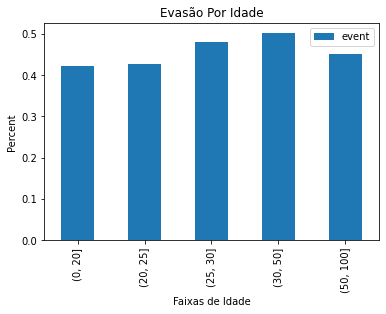

In [19]:
col = 'idade_cat'
df[col] = pd.cut(df.idade_ingresso, bins=[0,20,25,30,50,100])


ax = df[idx].groupby(col).agg({'event':'mean'}).plot.bar()
ax.set(ylabel="Percent")
ax.set(title='Evasão Por Idade', xlabel='Faixas de Idade')
plt.show()

# Turno afeta evasão?

In [20]:
idx = (df['time'] == df.groupby('matricula')['time'].transform('max'))

df[idx].groupby('turno').agg({'event':'mean'})

,event
turno,
Matutino,0.365709
Matutino e Vespertino,0.460377
Noturno,0.412126
Vespertino,0.427184


# Grau afeta evasão?

In [21]:
idx = (df['time'] == df.groupby('matricula')['time'].transform('max'))

df[idx].groupby('grau').agg({'event':'mean'})

,event
grau,
Bacharelado,0.442791
Licenciatura,0.424640
Tecnológico,0.471836


# Análise Bivariada

Idade Ingresso vs Turno


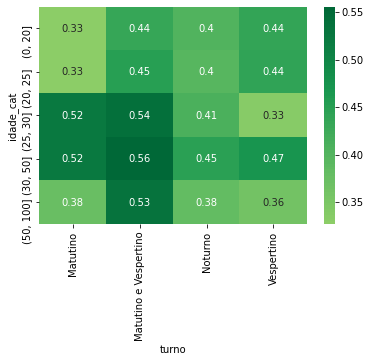

Idade Ingresso vs Grau do Curso


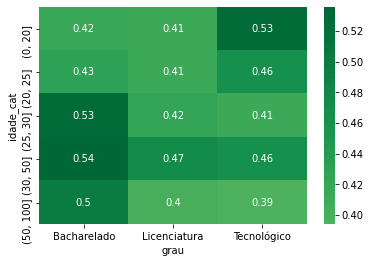

Idade Ingresso vs Sexo


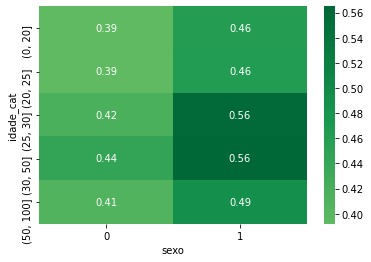

Idade Ingresso vs Cotista


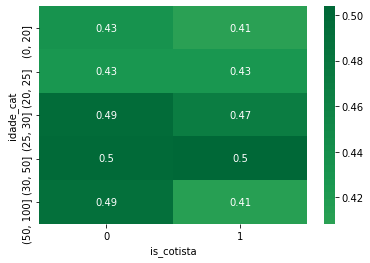

Idade Ingresso vs Migrante


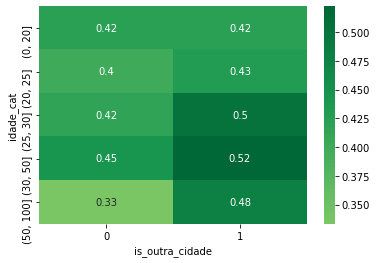

Idade Ingresso vs Período


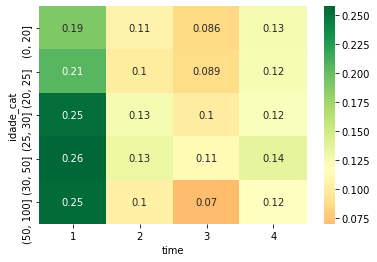

Turno vs Grau do Curso


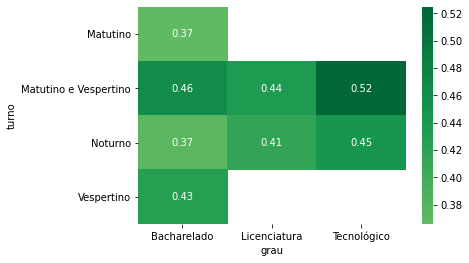

Turno vs Sexo


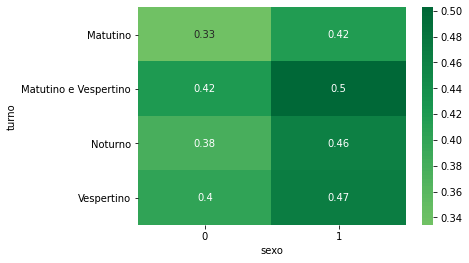

Turno vs Cotista


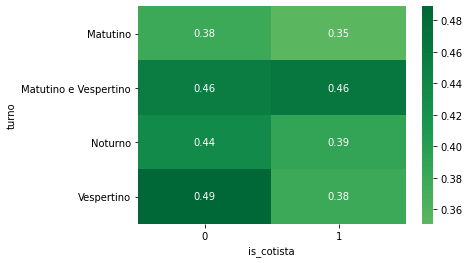

Turno vs Migrante


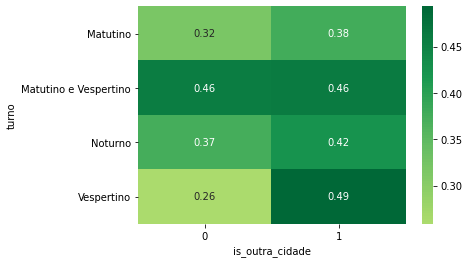

Turno vs Período


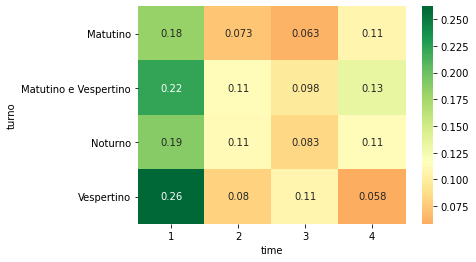

Grau do Curso vs Sexo


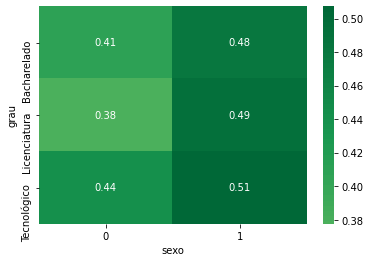

Grau do Curso vs Cotista


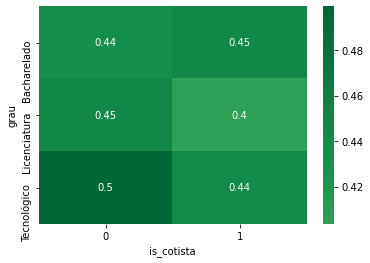

Grau do Curso vs Migrante


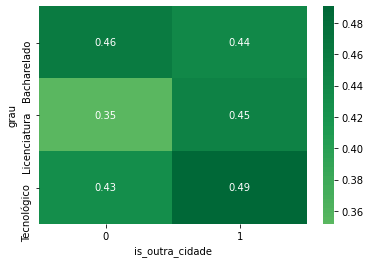

Grau do Curso vs Período


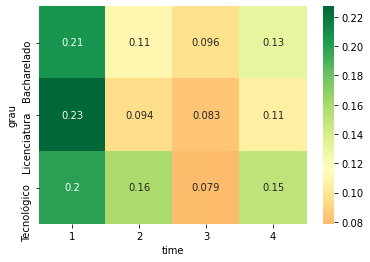

Sexo vs Cotista


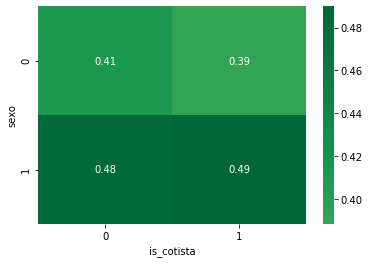

Sexo vs Migrante


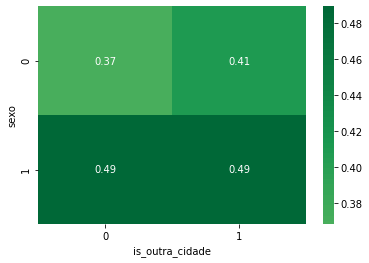

Sexo vs Período


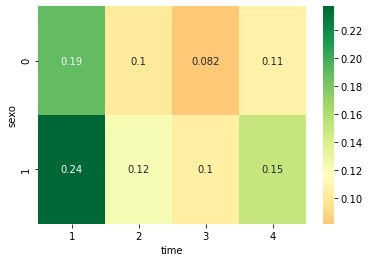

Cotista vs Migrante


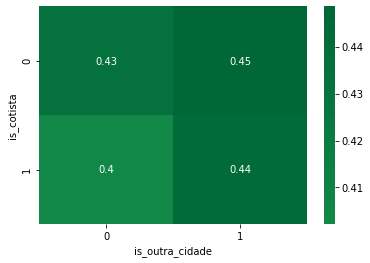

Cotista vs Período


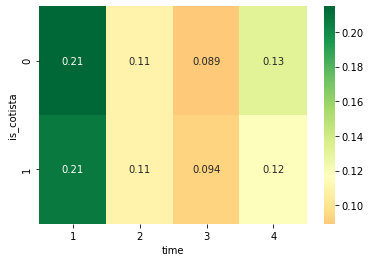

Migrante vs Período


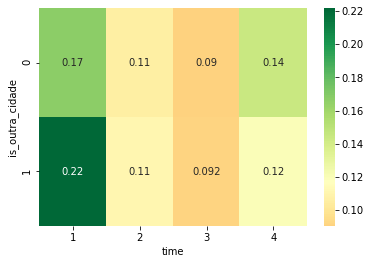

In [22]:
nomes = ['Idade Ingresso', 'Turno', 'Grau do Curso', 'Sexo', 'Cotista', 'Migrante', 'Período']
x = ['idade_cat', 'turno', 'grau', 'sexo', 'is_cotista',  'is_outra_cidade', 'time']

idx = df['time'] == df.groupby('matricula')['time'].transform('max')


for i in range(0, len(x)):
    for j in range(i+1, len(x)):
        print('%s vs %s'%(nomes[i], nomes[j]))
        if x[j] == 'time':
            result = pd.pivot_table(data=df, index=x[i], columns=x[j], values='event')
        else:
            result = pd.pivot_table(data=df[idx], index=x[i], columns=x[j], values='event')
        sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
        plt.show()